In [1]:
def nfm(weight):
    return torch.inner(weight.flatten(start_dim=1), weight.flatten(start_dim=1))

In [2]:
import torch
import os
from segmentation_models_pytorch.metrics import get_stats, iou_score
from utils.utils import display_image_and_mask
from utils.data_loading import TomatoLeafDataset
from unet.model import TomatoLeafModel

DIR = "data/"
models_list = os.listdir("model_checkpoint") # WE DON"T HAVE THIS IN GITHUB, DOWNLOAD IT FROM GDOCS
model_ckpt_file = models_list[-1]

# Load the model
model = TomatoLeafModel()
weights = torch.load("model_checkpoint/" + model_ckpt_file, weights_only=True)
model.load_state_dict(weights)
model.to("cpu")
model.eval()

# Load the dataset
test_loader = TomatoLeafDataset(DIR + "test.csv", DIR + "test")
train_loader = TomatoLeafDataset(DIR + "train.csv", DIR + "train")
image = test_loader[0]['image'].unsqueeze(0)
image = image

/home/vscode/.local/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/vscode/.local/lib/python3.12/site-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.17 (you have 1.4.16). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


In [36]:
# Compute the NFM for each param
nfm_dict = {}
for name, param in model.named_parameters():
    if param.requires_grad and len(param.shape) > 1:
        nfm_dict[f'{name}'] = nfm(param)

Text(0.5, 1.0, 'Convolutional Weights of Layer 3')

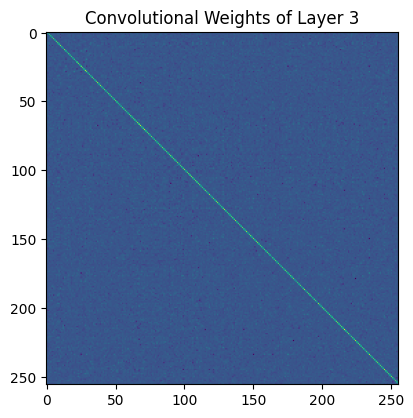

In [47]:
import matplotlib.pyplot as plt

figsize=(10, 6)
plt.figure(figsize=figsize)
plt.subplot(1, 2, 1)
plt.imshow(nfm_dict["model.encoder.layer3.0.conv2.weight"].detach().numpy())
plt.title('Convolutional Weights of Layer 3')

In [59]:
print(model.model.encoder.conv1.weight.grad)

None
